In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180410

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
fontsize = 40

import os
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy.interpolate import interp1d
from IPython.display import display, HTML
from scipy import interpolate
from scipy import integrate

PWD = os.getcwd()
np.set_printoptions(linewidth=130, precision=5)

Populating the interactive namespace from numpy and matplotlib


1.000000e+00 0.92902597334 1.03142602608e-14
1.000000e+01 7.44285115496 3.36512309882e-09
1.000000e+02 23.365325977 3.12685091397e-07
1.000000e+03

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


 38.1423463763 4.24355192959e-07
1.000000e+04 52.6415808434 0.000497919861434
6.283185e+03 (49.71964107895853, 0.004235886296271426)
6.283185e+03 (-3.312704035261106, 4.861951951728252e-08)


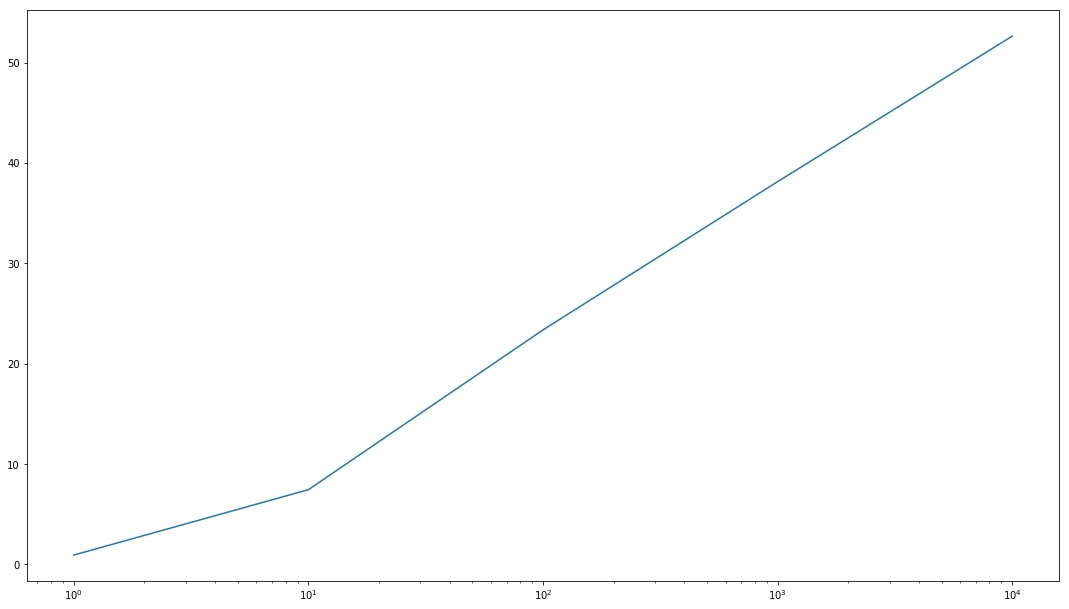

In [116]:
ph = 1
phi = 1
x1 = 1
x2 = 1
x3 = 1
r = 1
rho = 0.2
maxtheta = 100000

dx1 = lambda theta: -x1 + np.cos(theta)*(r - rho*np.sin(phi)) + (ph*rho*np.cos(phi)*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
dx2 = lambda theta: -x2 - (ph*rho*np.cos(phi)*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2) + (r - rho*np.sin(phi))*np.sin(theta)
dx3 = lambda theta: (ph*theta)/(2.*np.pi) - x3 + (2*np.pi*r*rho*np.cos(phi))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
ds = lambda theta: np.sqrt(dx1(theta)**2 + dx2(theta)**2 + dx3(theta)**2)
invds = lambda theta: 1 / ds(theta)
invds2 = lambda theta: (dx1(theta) * dx3(theta)) / ds(theta) ** 3
n_int = np.int(np.log10(np.float64(maxtheta)))
int_upp = 10**np.arange(np.float64(n_int))
int_invr = np.zeros(n_int)
int_err = np.zeros(n_int)
for i0, tint_upp in enumerate(int_upp):
    int_invr[i0], int_err[i0] = integrate.quad(invds, 0, tint_upp, limit=500000, maxp1=500000, limlst=500000)
    print('%e' % tint_upp, int_invr[i0], int_err[i0])
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.patch.set_facecolor('white')
ax.semilogx(int_upp, int_invr)
int_upp = 1000*2*np.pi
print('%e' % int_upp, integrate.quad(invds, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))
print('%e' % int_upp, integrate.quad(invds2, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))


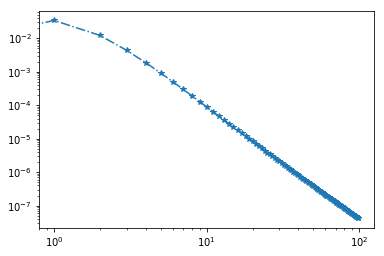

In [12]:
# integrate 1/r over one period
ph = 1
phi = 1
x1 = 0
x2 = 0
x3 = 0
r = 1
rho = 0.2
jth_list = np.arange(100)  # the jth period, means theta ranging from jth*2pi to (jth+1)*2pi

dx1 = lambda theta: -x1 + np.cos(theta)*(r - rho*np.sin(phi)) + (ph*rho*np.cos(phi)*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
dx2 = lambda theta: -x2 - (ph*rho*np.cos(phi)*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2) + (r - rho*np.sin(phi))*np.sin(theta)
dx3 = lambda theta: (ph*theta)/(2.*np.pi) - x3 + (2*np.pi*r*rho*np.cos(phi))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
ds = lambda theta: np.sqrt(dx1(theta)**2 + dx2(theta)**2 + dx3(theta)**2)
invds = lambda theta: 1 / ds(theta)
invds2 = lambda theta: (dx1(theta) * dx3(theta)) / ds(theta) ** 3

int_invr = np.zeros(jth_list.shape)
int_err = np.zeros(jth_list.shape)
for i0, jth in enumerate(jth_list):
    int_invr[i0], int_err[i0] = integrate.quad(invds2, jth*2*pi, (jth+1)*2*pi, limit=500000, maxp1=500000, limlst=500000)
#     print('%d' % jth, int_invr[i0], int_err[i0])
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.patch.set_facecolor('white')
ax.loglog(jth_list, int_invr, '*-.')


In [3]:
int_invr

array([4, 4, 2])

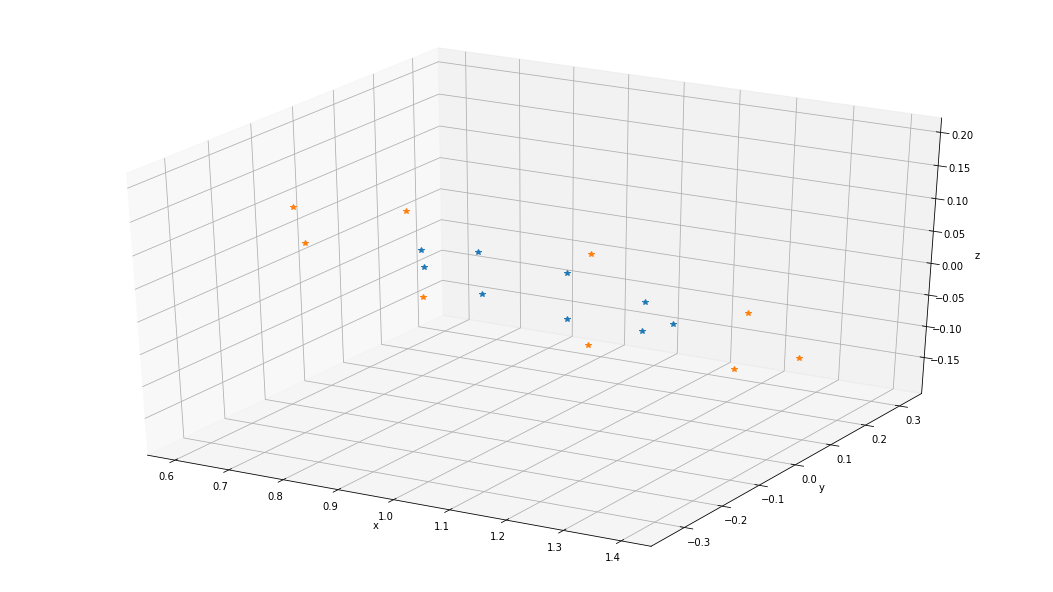

In [95]:
ph = 10   # helix pitch
r = 1    # helix radius
frho = 0.2    # helix minor radius for force nodes 
urho = 0.4    # helix minor radius for velocity nodes
n_node = 9    # number of nodes
theta = 0    # location of node plane

# rotation matrix x_global = R3*x_local
R3 = np.array((((-2*np.pi*r*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),(ph*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-np.cos(theta)),((2*np.pi*r*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-((ph*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)),-np.sin(theta)),(ph/np.sqrt(ph**2 + 4*np.pi**2*r**2),(2*np.pi*r)/np.sqrt(ph**2 + 4*np.pi**2*r**2),0)))
phi = np.linspace(0, 2*np.pi, n_node, endpoint=False)
helix_center = np.array((r*np.cos(theta), r*np.sin(theta), ph/(2*np.pi)*theta)).reshape((-1, 1))
fnodes = np.zeros((3, n_node))
fnodes[1] = frho * np.cos(phi)
fnodes[2] = frho * np.sin(phi)
fnodes = np.dot(R3, fnodes) + helix_center
unodes = np.zeros((3, n_node))
unodes[1] = urho * np.cos(phi)
unodes[2] = urho * np.sin(phi)
unodes = np.dot(R3, unodes) + helix_center

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')
ax.plot(*fnodes, '*')
ax.plot(*unodes, '*')
# ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
def InfHelixGreenFun():
    # fnodes, unodes: node coordinates of force and velocity, without check, make sure correct. 
    # frho, urho, minor radius of helix, 
    # r, major radius of helix; ph, helix pitch, 
    # maxtheta, upper limit of integration. 
    
    phi = 1
    maxtheta = 100000
    